In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [4]:
df_norm = norm_func(data.iloc[:,1:])

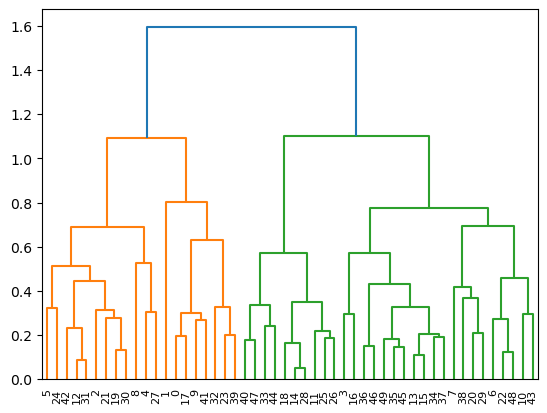

In [5]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [6]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [7]:
y_hc = hc.fit_predict(df_norm)

In [8]:
data['h_clusterid'] = y_hc 

In [9]:
data.head(2)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3


In [10]:
data.groupby(["h_clusterid"])["Unnamed: 0"].apply(lambda x:tuple(x))

h_clusterid
0    (Alabama, Arizona, Arkansas, California, Conne...
1                                          (Delaware,)
2                                           (Florida,)
3                                            (Alaska,)
4                                          (Colorado,)
Name: Unnamed: 0, dtype: object

# k means

In [11]:
df=pd.read_csv("crime_data.csv")

In [12]:
df_norm = norm_func(df.iloc[:,1:])

In [13]:
from sklearn.cluster import KMeans

In [14]:
model=KMeans(n_clusters=5)
model.fit(df_norm)

KMeans(n_clusters=5)

In [15]:
model.labels_

array([1, 3, 3, 2, 3, 3, 4, 2, 3, 1, 4, 0, 3, 2, 0, 2, 2, 1, 0, 3, 4, 3,
       0, 1, 2, 0, 2, 3, 0, 4, 3, 3, 1, 0, 2, 2, 2, 2, 4, 1, 0, 1, 3, 4,
       0, 2, 2, 0, 0, 2])

In [16]:
md=pd.Series(model.labels_)


In [17]:
data["labels"]=pd.Series(model.labels_)


In [18]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,labels
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,3,3
2,Arizona,8.1,294,80,31.0,0,3
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,0,3


In [19]:
data.groupby(["labels"])["Unnamed: 0"].apply(lambda x:tuple(x))

labels
0    (Idaho, Iowa, Maine, Minnesota, Montana, New H...
1    (Alabama, Georgia, Louisiana, Mississippi, Nor...
2    (Arkansas, Delaware, Indiana, Kansas, Kentucky...
3    (Alaska, Arizona, California, Colorado, Florid...
4    (Connecticut, Hawaii, Massachusetts, New Jerse...
Name: Unnamed: 0, dtype: object

In [20]:
data[data["Unnamed: 0"].isin(["Connecticut", "Hawaii", "Massachusetts",])]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,labels
6,Connecticut,3.3,110,77,11.1,0,4
10,Hawaii,5.3,46,83,20.2,0,4
20,Massachusetts,4.4,149,85,16.3,0,4


# DBSCAN

In [21]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

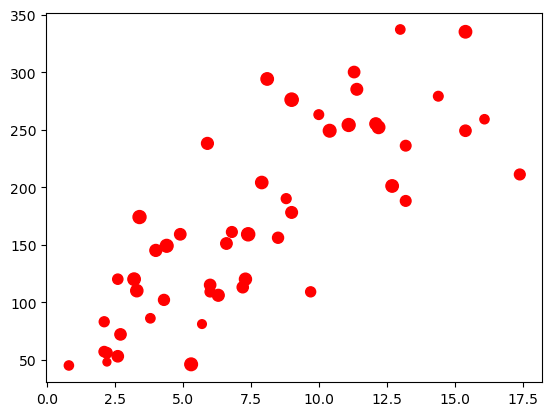

In [60]:
ds =DBSCAN(min_samples=3,eps=0.3)
class_pr=ds.fit_predict(df.iloc[:,1:5])
plt.scatter(df['Murder'],df['Assault'],df['UrbanPop'],c=class_pr,cmap=plt.cm.rainbow_r)

# finding the optimal number of clusters

In [61]:
dt=pd.read_csv('crime_data.csv')



In [62]:
dt.sample(12)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
13,Indiana,7.2,113,65,21.0
28,New Hampshire,2.1,57,56,9.5
10,Hawaii,5.3,46,83,20.2
27,Nevada,12.2,252,81,46.0
48,Wisconsin,2.6,53,66,10.8
19,Maryland,11.3,300,67,27.8
17,Louisiana,15.4,249,66,22.2
2,Arizona,8.1,294,80,31.0
43,Utah,3.2,120,80,22.9
26,Nebraska,4.3,102,62,16.5


In [63]:
nc=[1,2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(iris.iloc[:,:4])
    iner.append(km.inertia_)

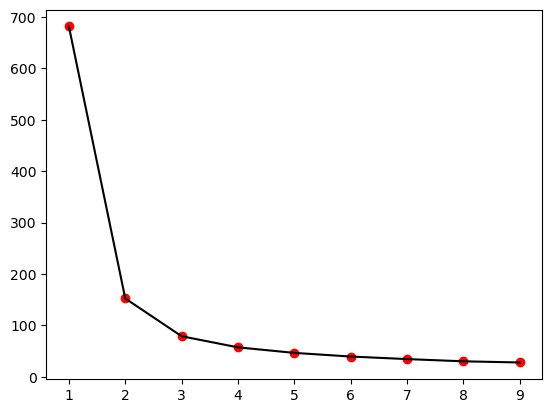

In [64]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# silhouette

In [65]:
from sklearn.metrics import silhouette_score as sil

In [66]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(iris.iloc[:,:4])
    sc_score.append(sil(iris.iloc[:,:4],y))

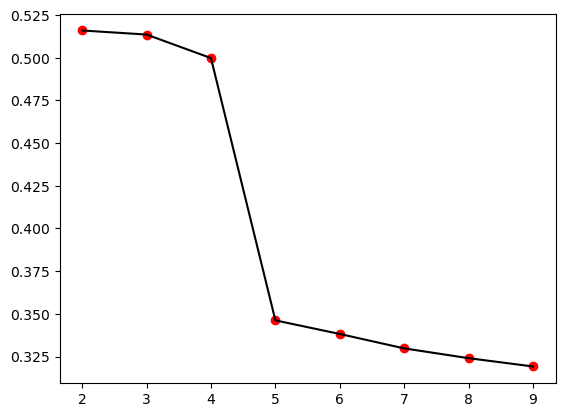

In [67]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

In [68]:
sc_score

[0.5159829508133179,
 0.513595322119222,
 0.49981282941719796,
 0.34617396930269595,
 0.3382031379620209,
 0.3297649053400506,
 0.3240250265714258,
 0.3191681237635773]